In [1]:
from keras.models import load_model
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt
from scipy import misc
import math
from tqdm import tqdm
import os

Using TensorFlow backend.


In [2]:
def show_source(i):
    plt.imshow(np.ones(X[i].shape) + X[i])

In [67]:
from src.gimp.draw.draw_triangle import draw_triangle as _draw_triangle
from src.gimp.draw.draw_line import draw_line as _draw_line
import os

def draw(y_, shape, size):
    path_to_image_results = '../result/gimp_images/nn/shapes'
    name = 'jupyter_test.png'
    os.system('python ../src/gimp/draw/draw_selection_shape.py --name {} --shape {} --size {} --r {} --g {} --b {} --a {} --x {} --y {} --w {} --h {} --rotation {}'\
              .format(name, shape, size, y_[0], y_[1], y_[2], y_[3], y_[4], y_[5], y_[6], y_[7], 0.5))
    image_data = plt.imread('%s/%s' % (path_to_image_results, name))[:,:,:3]
    plt.imshow(image_data)
    
def draw_rectangle(y, size=28):
    draw(y, 'rectangle', size)
    
def draw_ellipse(y, size=28):
    draw(y, 'ellipse', size)
    
def draw_triangle(y, size=28):
    path_to_image_results = '../result/gimp_images/nn/shapes'
    name = 'jupyter_test.png'
    _draw_triangle(name, size, y[0], y[1], y[2], y[3], y[4], y[5], y[6], y[7], y[8], y[9])
    image_data = plt.imread('%s/%s' % (path_to_image_results, name))[:,:,:3]
    plt.imshow(image_data)
    
def draw_line(y, size=28):
    path_to_image_results = '../result/gimp_images/nn/shapes'
    name = 'jupyter_test.png'
    _draw_line(name, size, y[0], y[1], y[2], y[3], y[4], y[5], y[6], y[7], y[8])
    image_data = plt.imread('%s/%s' % (path_to_image_results, name))[:,:,:3]
    plt.imshow(image_data)

In [68]:
model = load_model('../result/model/rectangle_small_without_rotation/model.06-0.01.hdf5')

In [88]:
path = "../data/dataset/rectangle_small_without_rotation/"
name = "train"
X = np.load(path + "%s_X.npy" % name, mmap_mode="r")
Y = np.load(path + "%s_Y.npy" % name, mmap_mode="r")

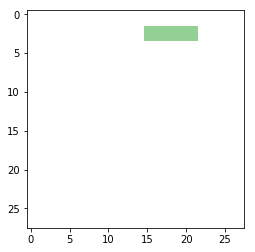

In [93]:
index = np.random.randint(0, X.shape[0])
show_source(index)

[0.3362662  0.74001634 0.3219414  0.597045   0.6571842  0.08389537
 0.22304395 0.09328511 0.50293005]


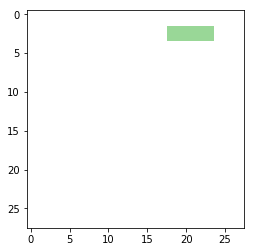

In [94]:
y = model.predict(X[index].reshape([1, 28, 28, 3]))
print(y[0])
draw_rectangle(y[0], size=28)